# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 

**Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#loading a csv file 
tweet_archive = pd.read_csv('twitter-archive-enhanced (1).csv')

In [3]:
#checking to see if it is loaded successfully
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
959,751251247299190784,NaN,NaN,2016-07-08 03:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gilbert. He's being chased by a battal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751251247...,10,10,Gilbert,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
808,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
608,797971864723324932,NaN,NaN,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12,10,None,None,None,pupper,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Great teeth. Nice horn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670474236...,10,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)
    
#to move the file into a dataframe
prediction = pd.read_csv('image-predictions (1).tsv', sep='\t')

In [5]:
#checking to see if it is loaded successfully
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,True,Samoyed,0.141241,True,Pembroke,0.013455,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
df = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
tweet_columns = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
#checking to see if it is loaded successfully
tweet_columns

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data




In [8]:
#visual assesment of tweet_archive
tweet_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#visual assessment of prediction
prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
#visual assessment of tweet_columns
tweet_columns.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


Assessing Programatically

In [11]:
#checking the values contained in the rating denominator column of the tweet_archive table
tweet_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#checking the values contained in the rating numerator column of the tweet_archive table
tweet_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#still observing our data 
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#still observing our data 
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#still observing our data 
tweet_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweet_columns.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
#to be sure a tweet was not recorded twice
tweet_archive[tweet_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Not checking for duplicates on the other tables because tweet_id is present in the 3 tables and this may cause code repetition.

In [20]:
# checking for possible missspelling and incorrect names within the name columns in the tweet_archive table
tweet_archive['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Buddy            7
an               7
Toby             7
Daisy            7
Bailey           7
Koda             6
Bella            6
Oscar            6
Dave             6
Rusty            6
Stanley          6
Scout            6
Jack             6
Leo              6
Jax              6
Milo             6
Chester          5
              ... 
Tedrick          1
Derby            1
Beckham          1
Gerbald          1
Zoe              1
Stormy           1
Daniel           1
Charl            1
Pherb            1
Lucky            1
Horace           1
Shakespeare      1
Newt             1
Antony           1
Furzey           1
Jed              1
Spencer          1
Kirk             1
Brockly          1
Schnitzel        1
Pete             1
Maks        

In [21]:
#taking a random sample overview of the dog stages spread out in four columns
tweet_archive[['doggo','pupper', 'puppo', 'floofer']].sample(9)

,doggo,pupper,puppo,floofer
32,None,None,None,None
1825,None,pupper,None,None
1180,None,None,None,None
501,doggo,None,None,None
1634,None,None,None,None
1689,None,None,None,None
2146,None,None,None,None
1702,None,None,None,None
1984,None,None,None,None


### Quality issues

1. *Null values encoded as 'none' should be left blank or replaced with NaN.*

2. *Ratings numerator values less than 10 are likely data quality issues.*

3. *Presence of null values in the retweet columns as we need only the original ratings not retweets*.

4. *The columns in the prediction table are not easy to understand or identify and should be renamed to ease understanding*.

5. *Drop columns not needed from the analysis from the feed table.*

6. *Tweet_id in all the tables are in integer format instead of a string*.

7. *The timestamp column is not in date_time format*

8. *The floofer column should be floof*

### Tidiness issues

1. Multiple columns in the tables should be centralized into the main tweet_archive table

2. Dog stages are spread over four columns instead of one column


## Cleaning Data
In this section, we clean **all** of the issues we documented while assessing. 



In [22]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
prediction_copy = prediction.copy()
tweet_columns_copy = tweet_columns.copy()

In [23]:
#testing the copied items
tweet_archive_copy.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1:

#### Define: Null values encoded as 'none' should be left blank or replaced with NaN.


#### Code

In [24]:
tweet_archive_copy['doggo'].replace('None', value='', inplace=True)
tweet_archive_copy['pupper'].replace('None', value='', inplace=True)
tweet_archive_copy['puppo'].replace('None', value='', inplace=True)
tweet_archive_copy['floofer'].replace('None', value='', inplace=True)
tweet_archive_copy['name'].replace('None', value='', inplace=True)

#### Test

In [25]:
tweet_archive_copy.pupper

0             
1             
2             
3             
4             
5             
6             
7             
8             
9             
10            
11            
12            
13            
14            
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Name: pupper, Length: 2356, dtype: object

In [26]:
tweet_archive_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #2: 

#### Define: Ratings numerator values less than 10 are likely data quality issues

#### Code

In [27]:
tweet_archive_copy.text.head(2)

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
Name: text, dtype: object

In [28]:
#Extracting the rating from the text using regex and split method
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

In [29]:
tweet_archive_copy = tweet_archive_copy.astype({'rating_numerator':float})

In [30]:
#Convert the float value to int
tweet_archive_copy = tweet_archive_copy.astype({'rating_numerator':int})

In [31]:
tweet_archive_copy['rating_numerator'].mask(tweet_archive_copy['rating_numerator'] < 10, 10, inplace=True)

#### Test

In [32]:
tweet_archive_copy['rating_numerator'].value_counts()

10      902
12      558
11      466
13      352
14       54
15        2
420       2
88        1
20        1
24        1
44        1
50        1
60        1
80        1
84        1
165       1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

ISSUE 3 :

DEFINE : Presence of null values in the retweet columns as we need only the original ratings not retweets

CODE:

In [33]:
# We isolate the null values in the retweet columns
mask1 = tweet_archive['retweeted_status_id'].isnull()
mask2 = tweet_archive['retweeted_status_user_id'].isnull()
mask3 = tweet_archive['retweeted_status_timestamp'].isnull()
tweet_archive[mask1 & mask2 & mask3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [34]:
#drop the null values in the columns
tweet_archive = tweet_archive.dropna(subset = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

TEST:

In [35]:
tweet_archive[tweet_archive['retweeted_status_id'].isnull() & tweet_archive['retweeted_status_user_id'].isnull() & tweet_archive['retweeted_status_timestamp'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


ISSUE 4

DEFINE : The columns in the prediction table are not easy to understand or identify and should be renamed to ease understanding

CODE:

In [36]:
prediction_copy.columns = ['tweet_id', 'jpeg_url', 'image_url', 'prediction_1', 'prediction_1_confidence', 'prediction_1_dog', 'prediction_2', 'prediction_2_confidence', 'prediction_2_dog', 'prediction_3', 'prediction_3_confidence', 'prediction_3_dog']

TEST:

In [360]:
prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null int64
jpeg_url                   2075 non-null object
image_url                  2075 non-null int64
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_dog           2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_dog           2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confidence    2075 non-null float64
prediction_3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


ISSUE 5

DEFINE: Drop columns not needed from the analysis from the feed table

CODE

In [361]:
tweet_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace= True)

TEST:

In [362]:
tweet_archive_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,


ISSUE 6

DEFINE: Tweet_id in all the tables are in integer format instead of a string

CODE:

In [363]:
tweet_archive_copy = tweet_archive_copy.astype({'tweet_id':str})
prediction_copy = prediction_copy.astype({'tweet_id':str})
tweet_columns_copy = tweet_columns_copy.astype({'tweet_id':str})

TEST:

In [364]:
#confirming the dtype 
prediction_copy['tweet_id'].dtypes

dtype('O')

ISSUE 7

DEFINE: The timestamp column is not in date_time format so i convert to date_time format

CODE:

In [365]:
tweet_archive_copy['timestamp']= pd.to_datetime(tweet_archive_copy['timestamp'], infer_datetime_format=True)

TEST:

In [366]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


ISSUE 8

DEFINE: The floofer column should be changed to floof

CODE

In [367]:
tweet_archive_copy = tweet_archive_copy.rename(columns={'floofer':'floof'})

TEST:

In [368]:
tweet_archive_copy.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo


TIDINESS

ISSUE 1

DEFINE: Merge the tweet_archive, prediction and tweet_columns table together using the tweet_id

CODE

In [369]:
#merge the tweet_archive_copy and the predicton copy tables to form one single table
tweet_archive_copy = pd.merge(tweet_archive_copy, prediction_copy, on='tweet_id')

In [370]:
#merge the tweet_archive_copy and tweet_columns_type
tweet_archive_copy = pd.merge(tweet_archive_copy, tweet_columns_copy, on='tweet_id')

TEST:

In [371]:
tweet_archive_copy.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,...,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count


In [372]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                   2073 non-null object
timestamp                  2073 non-null datetime64[ns]
source                     2073 non-null object
text                       2073 non-null object
expanded_urls              2073 non-null object
rating_numerator           2073 non-null int64
rating_denominator         2073 non-null int64
name                       2073 non-null object
doggo                      2073 non-null object
floof                      2073 non-null object
pupper                     2073 non-null object
puppo                      2073 non-null object
jpeg_url                   2073 non-null object
image_url                  2073 non-null int64
prediction_1               2073 non-null object
prediction_1_confidence    2073 non-null float64
prediction_1_dog           2073 non-null bool
prediction_2               2073 non-null object
prediction_2_confidence  

ISSUE 2

DEFINE: Combining the different stages of the dogs to one column

CODE:

In [376]:
tweet_archive_copy['dog_stage']= tweet_archive_copy.doggo + tweet_archive_copy.floof + tweet_archive_copy.pupper + tweet_archive_copy.puppo

In [377]:
##the results arent exactly what i want as the are some columns having some words mubbled together and there a '' value account for over 100 of the total values in the column
tweet_archive_copy['dog_stage'].replace({'doggopupper':'doggo, pupper', 'doggopuppo':'doggo, puppo', 'doggofloofer':'doggo, floof', 'floofer':'floof'}, inplace=True)

In [378]:
##replacing the '' in the column to null values for easy reference in later part
tweet_archive_copy['dog_stage'].replace({'':np.NaN}, inplace=True)

TEST:

In [379]:
tweet_archive_copy['dog_stage'].value_counts()

pupper           210
doggo             67
puppo             23
doggo, pupper     11
floof              7
doggo, puppo       1
doggo, floof       1
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [380]:
tweet_archive_copy.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [381]:
#grouping the dogstage and comparing with the average retweet counts
tweet_archive_copy.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo             7901.552239
doggo, floof      3433.000000
doggo, pupper     5262.909091
doggo, puppo     19196.000000
floof             4968.714286
pupper            2468.209524
puppo             6431.434783
Name: retweet_count, dtype: float64

In [382]:
#grouping the dogstage and comparing with the average favorite count
tweet_archive_copy.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo            18200.776119
doggo, floof     17169.000000
doggo, pupper    10254.363636
doggo, puppo     47844.000000
floof            13206.000000
pupper            6957.814286
puppo            20643.739130
Name: favorite_count, dtype: float64

In [383]:
#grouping the dogstage and comparing with the average rating numerator
tweet_archive_copy.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo            12.059701
doggo, floof     11.000000
doggo, pupper    11.636364
doggo, puppo     13.000000
floof            12.000000
pupper           11.057143
puppo            12.043478
Name: rating_numerator, dtype: float64

### Insights:
1. Pictures of dogs within the doggo and puppo stage ilicit the most average retweets among those engaging the we rate dogs twitter account.


2. Analyzing the favorite count or the likes cout also showed that the dogs pictures within the doggo and puppo ages were the most liked on an average


3. Analyzing the relationship between the dog stages and the rating by the we rate dogs twitter accounts showed  that dogs within the doggo and puppo ages received the most average ratings by the account.

### Visualization

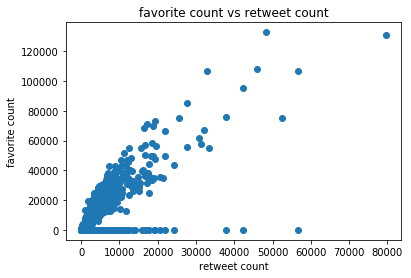

In [384]:
#checking the relationship between the retweet count and the favorite count
x = tweet_archive_copy.retweet_count
y = tweet_archive_copy.favorite_count
plt.scatter(x,y)
plt.title('favorite count vs retweet count')
plt.xlabel('retweet count')
plt.ylabel('favorite count') ;